# 2020 Post Season Projections

In [1]:
import pandas as pd

d = pd.read_csv('~/Downloads/mlb_elo_latest.csv')
d.shape

(922, 26)

In [2]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2020-10-01,2020,0,c,SDP,STL,1523.681570,1518.731209,0.555323,0.444677,...,NaN,NaN,NaN,NaN,0.563662,0.436338,NaN,NaN,NaN,NaN
1,2020-10-01,2020,0,c,LAD,MIL,1595.308574,1504.062746,0.707763,0.292237,...,NaN,NaN,NaN,NaN,0.681864,0.318136,NaN,NaN,NaN,NaN
2,2020-10-01,2020,0,c,CHC,FLA,1522.339090,1473.076732,0.636987,0.363013,...,NaN,NaN,NaN,NaN,0.627817,0.372183,NaN,NaN,NaN,NaN
3,2020-10-01,2020,0,c,ATL,CIN,1539.012081,1500.488990,0.617720,0.382280,...,NaN,57.220006,NaN,13.143173,0.540359,0.459641,NaN,NaN,NaN,NaN
4,2020-09-30,2020,0,c,TBD,TOR,1561.455109,1501.210806,0.656244,0.343756,...,56.395814,NaN,12.589997,NaN,0.645150,0.354850,NaN,NaN,NaN,NaN


In [3]:
d.date.min(), d.date.max()

('2020-07-23', '2020-10-01')

In [4]:
d = d[d.date.le('2020-09-27')]
d.shape

(898, 26)

In [5]:
import numpy as np
rename_teams = {
    'ANA': 'LAA',
    'CHW': 'CWS',
    'FLA': 'MIA',
    'KCR': 'KC',
    'SDP': 'SD',
    'SFG': 'SF',
    'TBD': 'TB',
    'WSN': 'WSH'
}
d['team1'] = np.where(d.team1.isin(rename_teams), d.team1.map(rename_teams), d.team1)
d['team2'] = np.where(d.team2.isin(rename_teams), d.team2.map(rename_teams), d.team2)

In [6]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
24,2020-09-27,2020,0,NaN,STL,MIL,1516.773757,1506.020198,0.549848,0.450152,...,49.649779,50.501033,-7.348463,-2.464765,0.506401,0.493599,1512.135815,1509.101046,5.0,2.0
25,2020-09-27,2020,0,NaN,TB,PHI,1559.364855,1499.372724,0.618573,0.381427,...,47.171692,57.750792,-29.950748,28.407053,0.509891,0.490109,1557.827103,1497.827571,5.0,0.0
26,2020-09-27,2020,0,NaN,OAK,SEA,1546.342522,1481.520293,0.625112,0.374888,...,50.223631,54.879768,-2.275984,31.232185,0.571679,0.428321,1531.847158,1454.573391,6.0,2.0
27,2020-09-27,2020,0,NaN,MIN,CIN,1540.516532,1498.348865,0.594088,0.405912,...,53.877441,57.017249,1.369544,12.505863,0.546466,0.453534,1550.216205,1519.191241,3.0,5.0
28,2020-09-27,2020,0,NaN,LAD,LAA,1593.707374,1481.539764,0.686508,0.313492,...,47.400000,46.025396,-22.194560,-13.487280,0.652045,0.347955,1603.668369,1492.658170,5.0,0.0


In [7]:
d[['team1' ,'team2']].melt()['value']

0       STL
1        TB
2       OAK
3       MIN
4       LAD
       ... 
1791    TOR
1792    DET
1793    ATL
1794     SF
1795    NYY
Name: value, Length: 1796, dtype: object

In [8]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().fit(d[['team1', 'team2']].melt()[['value']])
d['home_team_id'] = encoder.transform(d[['team1']]).astype(int)
d['away_team_id'] = encoder.transform(d[['team2']]).astype(int)
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,home_team_id,away_team_id
24,2020-09-27,2020,0,NaN,STL,MIL,1516.773757,1506.020198,0.549848,0.450152,...,-7.348463,-2.464765,0.506401,0.493599,1512.135815,1509.101046,5.0,2.0,25,15
25,2020-09-27,2020,0,NaN,TB,PHI,1559.364855,1499.372724,0.618573,0.381427,...,-29.950748,28.407053,0.509891,0.490109,1557.827103,1497.827571,5.0,0.0,26,20
26,2020-09-27,2020,0,NaN,OAK,SEA,1546.342522,1481.520293,0.625112,0.374888,...,-2.275984,31.232185,0.571679,0.428321,1531.847158,1454.573391,6.0,2.0,19,23
27,2020-09-27,2020,0,NaN,MIN,CIN,1540.516532,1498.348865,0.594088,0.405912,...,1.369544,12.505863,0.546466,0.453534,1550.216205,1519.191241,3.0,5.0,16,5
28,2020-09-27,2020,0,NaN,LAD,LAA,1593.707374,1481.539764,0.686508,0.313492,...,-22.194560,-13.487280,0.652045,0.347955,1603.668369,1492.658170,5.0,0.0,13,12


In [9]:
d['home_team_win'] = d.score1.gt(d.score2).astype(int)
d['away_team_win'] = 1 - d.home_team_win
assert (d.home_team_win + d.away_team_win == 1).all()
d = d.groupby(['home_team_id', 'away_team_id', 'team1', 'team2'])[['home_team_win', 'away_team_win']].sum().reset_index()
d.head()

,home_team_id,away_team_id,team1,team2,home_team_win,away_team_win
0,0,7,ARI,COL,3,4
1,0,10,ARI,HOU,2,1
2,0,13,ARI,LAD,2,5
3,0,19,ARI,OAK,2,0
4,0,22,ARI,SD,3,0


In [10]:
d.shape

(239, 6)

In [11]:
d['total_games'] = d.home_team_win + d.away_team_win

In [12]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as T

n_teams = len(d.home_team_id.unique())
n_games = len(d)
n_matchups = np.array([d.total_games, d.total_games]).T
home_team_id = d.home_team_id.values
away_team_id = d.away_team_id.values
observed_wins = d[['home_team_win', 'away_team_win']]


def softmax(a):
    # reshaping for broadcasting
    a = T.exp(a)
    sum_ = T.sum(a, axis=1).reshape((1, -1)).T
    return a / sum_


with pm.Model() as model:
    σ_a = pm.Exponential('σ_a', np.log(5))

    a_t = pm.Normal('a_t', mu=0, sigma=σ_a, shape=n_teams)
    a_1, a_2 = a_t[home_team_id], a_t[away_team_id]
    a = T.stack([a_1, a_2]).T

    p = pm.Deterministic('p', softmax(a))
    wins = pm.Binomial('wins', n=n_matchups, p=p, shape=(n_games, 2), observed=observed_wins)

    trace = pm.sample(5_000, tune=4_000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a_t, σ_a]


Sampling 2 chains for 4_000 tune and 5_000 draw iterations (8_000 + 10_000 draws total) took 19 seconds.


/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b279588>,
      dtype=object)

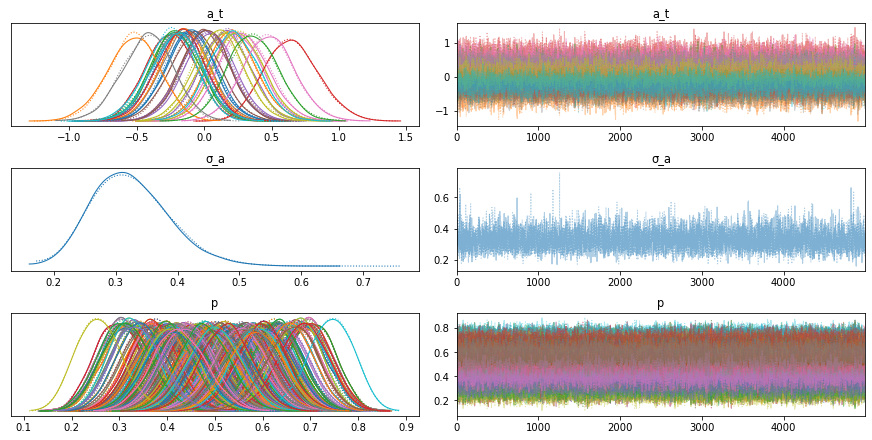

In [13]:
pm.traceplot(trace)

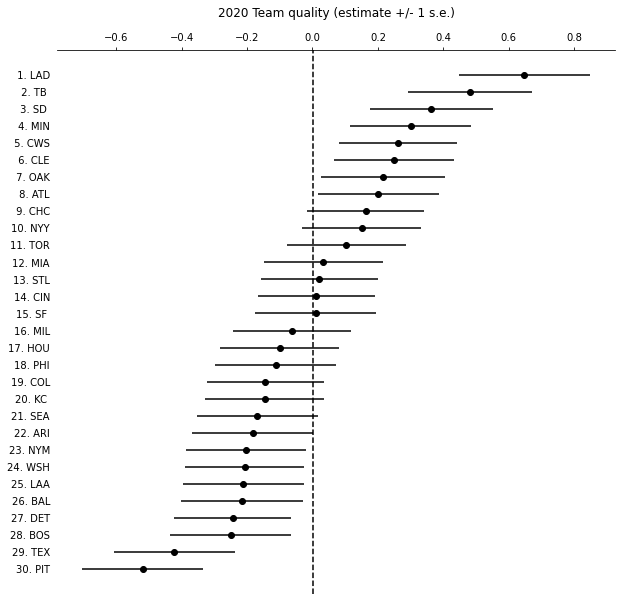

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

estimated_abilities = trace['a_t'][-5000:].mean(axis=0)
estimated_abilities_error = trace['a_t'][-5000:].std(axis=0)
team_id_lookup = {i: t for i, t in enumerate(encoder.categories_[0])}

center_line = np.mean(estimated_abilities)

values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('2020 Team quality (estimate +/- 1 s.e.)', y=1.05)

plt.savefig('2020-postseason-projections/team-quality-estimates.png')

# Projections

## Constants and paramters

In [15]:
# A lot of the values below will be hard-coded so I'll use these constants
# to make sure nothing gets dropped due to typos

WILD_CARD_CHAMPION = 'Wild Card Champion'
DIVISION_CHAMPION = 'Division Champion'
LEAGUE_CHAMPION = 'League Champion'
WORLD_SERIES_CHAMPION = 'World Series Champion'

LAD = 'LAD'
TB = 'TB'
SD = 'SD'
MIN = 'MIN'
CWS = 'CWS'
ATL = 'ATL'
CLE = 'CLE'
OAK = 'OAK'
CHC = 'CHC'
NYY = 'NYY'
TOR = 'TOR'
MIA = 'MIA'
STL = 'STL'
CIN = 'CIN'
MIL = 'MIL'
HOU = 'HOU'
SEA = 'SEA'
SF = 'SF'
PIT = 'PIT'
TEX = 'TEX'
ARI = 'ARI'
PHI = 'PHI'
NYM = 'NYM'
LAA = 'LAA'
KC = 'KC'
DET = 'DET'
COL = 'COL'
BOS = 'BOS'
BAL = 'BAL'
WSH = 'WSH'



# we'll need this for evaluations
series_id_to_prediction_column = {
    'wild_card_id': WILD_CARD_CHAMPION,
    'division_id': DIVISION_CHAMPION,
    'championship_id': LEAGUE_CHAMPION,
    'world_series_id': WORLD_SERIES_CHAMPION
}

In [16]:


series_ids = pd.DataFrame([
    # American League
    [TB, 1, 1, 1, 1],
    [TOR, 1, 1, 1, 1],
    [CLE, 2, 1, 1, 1],
    [NYY, 2, 1, 1, 1],
    [MIN, 3, 2, 1, 1],
    [HOU, 3, 2, 1, 1],
    [OAK, 4, 2, 1, 1],
    [CWS, 4, 2, 1, 1],
    # National League
    [LAD, 5, 3, 2, 1],
    [MIL, 5, 3, 2, 1],
    [SD,  6, 3, 2, 1],
    [STL, 6, 3, 2, 1],
    [CHC, 7, 4, 2, 1],
    [MIA, 7, 4, 2, 1],
    [ATL, 8, 4, 2, 1],
    [CIN, 8, 4, 2, 1],
], columns=['Team', 'wild_card_id', 'division_id', 'championship_id', 'world_series_id'])

In [17]:
import json
with open('divisions.json') as f:
    divisions = json.load(f)
divisions = {team: division for division, teams in divisions.items() for team in teams}
divisions

{'CWS': 'AL Central',
 'CLE': 'AL Central',
 'DET': 'AL Central',
 'KC': 'AL Central',
 'MIN': 'AL Central',
 'BAL': 'AL East',
 'BOS': 'AL East',
 'NYY': 'AL East',
 'TB': 'AL East',
 'TOR': 'AL East',
 'HOU': 'AL West',
 'LAA': 'AL West',
 'OAK': 'AL West',
 'SEA': 'AL West',
 'TEX': 'AL West',
 'CHC': 'NL Central',
 'CIN': 'NL Central',
 'MIL': 'NL Central',
 'PIT': 'NL Central',
 'STL': 'NL Central',
 'ATL': 'NL East',
 'MIA': 'NL East',
 'NYM': 'NL East',
 'PHI': 'NL East',
 'WSH': 'NL East',
 'ARI': 'NL West',
 'COL': 'NL West',
 'LAD': 'NL West',
 'SD': 'NL West',
 'SF': 'NL West'}

In [18]:
results = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    WILD_CARD_CHAMPION: 0,
    DIVISION_CHAMPION: 0,
    LEAGUE_CHAMPION: 0,
    WORLD_SERIES_CHAMPION: 0
})

In [19]:
import numpy as np
from tqdm.notebook import trange


def np_softmax(a):
    a = np.exp(a)
    return a / a.sum()


class Simulation:
    def __init__(self, a_post, encoder):
        self.a_post = a_post
        self.encoder = encoder
        self._sample = None
        
    def __enter__(self):
        self._sample = self.a_post[np.random.choice(len(self.a_post))]
        return self
    
    def __exit__(self, *exc):
        self._sample = None
        return False
    
    def simulate_series(self, team1, team2, best_of):
        id1, id2 = self._team_id(team1), self._team_id(team2)
        a = self._sample[[id1, id2]]
        p = np_softmax(a)
        wins1 = np.random.binomial(best_of, p[0])
        return team1 if wins1 > best_of // 2 else team2
    
    def _team_id(self, team):
        return self.encoder.transform([[team]])[0, 0].astype(int)



n_sim = 10_000

def make_update_results(category):
    def wrapper(df, team):
        df.loc[df.Team.eq(team), category] += 1

#         if category == DIVISION_CHAMPION:
#             df.loc[df.Team.eq(team), WILD_CARD_CHAMPION] -= 1
#         elif category == LEAGUE_CHAMPION:
#             df.loc[df.Team.eq(team), DIVISION_CHAMPION] -= 1
#         elif category == WORLD_SERIES_CHAMPION:
#             df.loc[df.Team.eq(team), LEAGUE_CHAMPION] -= 1

    return wrapper

update_wildcard_champion = make_update_results(WILD_CARD_CHAMPION)
update_division_champion = make_update_results(DIVISION_CHAMPION)
update_league_champion = make_update_results(LEAGUE_CHAMPION)
update_world_series_champion = make_update_results(WORLD_SERIES_CHAMPION)

for _ in trange(n_sim):
    with Simulation(trace['a_t'], encoder) as sim:

        # ALDS 1
        alwc1 = sim.simulate_series(TB, TOR, 3)
        alwc2 = sim.simulate_series(CLE, NYY, 3)
        update_wildcard_champion(results, alwc1)
        update_wildcard_champion(results, alwc2)

        alds1 = sim.simulate_series(alwc1, alwc2, 5)
        update_division_champion(results, alds1)

        # AL WC2
        alwc3 = sim.simulate_series(MIN, HOU, 3)
        alwc4 = sim.simulate_series(OAK, CWS, 3)
        update_wildcard_champion(results, alwc3)
        update_wildcard_champion(results, alwc4)

        alds2 = sim.simulate_series(alwc3, alwc4, 5)
        update_division_champion(results, alds2)

        # ALCS
        alcs = sim.simulate_series(alds1, alds2, 7)
        update_league_champion(results, alcs)

        # NLDS 1
        nlwc1 = sim.simulate_series(LAD, MIL, 3)
        nlwc2 = sim.simulate_series(SD, STL, 3)
        update_wildcard_champion(results, nlwc1)
        
        update_wildcard_champion(results, nlwc2)
        nlds1 = sim.simulate_series(nlwc1, nlwc2, 5)
        update_division_champion(results, nlds1)

        # NLDS 2
        nlwc3 = sim.simulate_series(CHC, MIA, 3)
        nlwc4 = sim.simulate_series(ATL, CIN, 3)
        update_wildcard_champion(results, nlwc3)
        update_wildcard_champion(results, nlwc4)
        
        nlds2 = sim.simulate_series(nlwc3, nlwc4, 5)
        update_division_champion(results, nlds2)

        # NLCS
        nlcs = sim.simulate_series(nlds1, nlds2, 7)
        update_league_champion(results, nlcs)

        # WS
        ws = sim.simulate_series(alcs, nlcs, 7)
        update_world_series_champion(results, ws)

results.loc[:, [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] /= (n_sim / 100)

In [21]:
results.sort_values(WORLD_SERIES_CHAMPION, ascending=False, inplace=True)
results.set_index(np.arange(len(results)) + 1, inplace=True)
results

,Team,Division,Wild Card Champion,Division Champion,League Champion,World Series Champion
1,LAD,NL West,73.64,49.47,36.79,24.93
2,TB,AL East,63.49,39.02,24.46,14.28
3,SD,NL West,63.26,28.70,17.83,9.61
4,MIN,AL Central,63.07,32.93,16.31,7.89
5,CWS,AL Central,51.34,28.25,13.40,5.88
6,CLE,AL Central,53.63,24.71,12.83,5.69
7,ATL,NL East,57.02,31.01,12.44,5.65
8,OAK,AL West,48.66,25.48,12.31,5.33
9,CHC,NL Central,55.18,28.07,10.60,4.21
10,NYY,AL East,46.37,19.56,9.07,3.67


In [22]:
# double checking that all the probabilities add to 1 for each series.
for s in series_ids.drop('Team', axis=1).columns:
    assert np.allclose(results.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum(), 100)

In [23]:
assert np.isclose(results[WORLD_SERIES_CHAMPION].sum(), 100.), results[WORLD_SERIES_CHAMPION].sum()

# Get predictions from mlb.com
https://www.mlb.com/news/2020-mlb-postseason-predictions

In [24]:
mlb_predictions = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    WILD_CARD_CHAMPION: 0,
    DIVISION_CHAMPION: 0,
    LEAGUE_CHAMPION: 0,
    WORLD_SERIES_CHAMPION: 0
})

# per richard justice
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, STL)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, ATL)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, ATL)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jesse sanchez
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, CWS)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jesse sanchez
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, MIA)

update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, TB)


# per mark feinsand
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, CIN)
update_division_champion(mlb_predictions, SD)

update_league_champion(mlb_predictions, SD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, TB)


# per sarah langs
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, TB)
update_league_champion(mlb_predictions, LAD)

update_world_series_champion(mlb_predictions, LAD)


# per anthony castrovince
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per will leitch
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, STL)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, ATL)

update_division_champion(mlb_predictions, CLE)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, ATL)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, CLE)

update_world_series_champion(mlb_predictions, CLE)


# per mike petriello
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per nathalie alonso
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, ATL)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, OAK)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per andrew simon
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, SD)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jon paul morosi
update_wildcard_champion(mlb_predictions, TOR)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, OAK)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per david venn

update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)

mlb_predictions.loc[:, [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] /= (12 / 100)
mlb_predictions[[WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] = mlb_predictions[[WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]].round()

In [25]:
mlb_predictions

,Team,Division,Wild Card Champion,Division Champion,League Champion,World Series Champion
0,ARI,NL West,0.0,0.0,0.0,0.0
8,ATL,NL East,25.0,17.0,0.0,0.0
16,BAL,AL East,0.0,0.0,0.0,0.0
24,BOS,AL East,0.0,0.0,0.0,0.0
32,CHC,NL Central,50.0,0.0,0.0,0.0
40,CIN,NL Central,75.0,83.0,0.0,0.0
48,CLE,AL Central,25.0,8.0,8.0,8.0
56,COL,NL West,0.0,0.0,0.0,0.0
64,CWS,AL Central,58.0,8.0,0.0,0.0
72,DET,AL Central,0.0,0.0,0.0,0.0


In [26]:
# double checking that all the probabilities add to 1 for each series.
for s in series_ids.drop('Team', axis=1).columns:
    assert (np.abs(mlb_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum() - 100) <= 1).all()

wild_card_id
1    100.0
2    100.0
3    100.0
4    100.0
5    100.0
6    100.0
7    100.0
8    100.0
Name: Wild Card Champion, dtype: float64
division_id
1     99.0
2    100.0
3    100.0
4    100.0
Name: Division Champion, dtype: float64
championship_id
1     99.0
2    100.0
Name: League Champion, dtype: float64
world_series_id
1    100.0
Name: World Series Champion, dtype: float64


# Get fivethirtyeight predictions
https://projects.fivethirtyeight.com/2020-mlb-predictions/

In [27]:
fivethirtyeight_predictions = pd.read_html('https://web.archive.org/web/20200929183851/https://projects.fivethirtyeight.com/2020-mlb-predictions/')
fivethirtyeight_predictions = fivethirtyeight_predictions[2].droplevel(0, axis=1).iloc[:, [0, 1, 4, 5, 6, 7]]
fivethirtyeight_predictions.columns = [
    'Team',
    'Division',
    WILD_CARD_CHAMPION,
    DIVISION_CHAMPION,
    LEAGUE_CHAMPION,
    WORLD_SERIES_CHAMPION
]
fivethirtyeight_predictions.replace('—', '0%', inplace=True)
fivethirtyeight_predictions.replace('<1%', '0%', inplace=True)
for col in [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]:
    fivethirtyeight_predictions[col] = fivethirtyeight_predictions[col].str[:-1].astype(float)
fivethirtyeight_predictions

,Team,Division,Wild Card Champion,Division Champion,League Champion,World Series Champion
0,DodgersDodgers,NL West,78.0,58.0,45.0,32.0
1,RaysRays,AL East,68.0,37.0,21.0,10.0
2,YankeesYankees,AL East,54.0,30.0,17.0,8.0
3,TwinsTwins,AL Central,55.0,32.0,17.0,7.0
4,BravesBraves,NL East,58.0,35.0,13.0,7.0
5,AstrosAstros,AL West,45.0,25.0,13.0,5.0
6,PadresPadres,NL West,58.0,20.0,11.0,5.0
7,CubsCubs,NL Central,69.0,33.0,11.0,5.0
8,AthleticsAthletics,AL West,57.0,26.0,12.0,5.0
9,IndiansIndians,AL Central,46.0,21.0,10.0,4.0


In [28]:
fivethirtyeight_rename = {
    'DodgersDodgers': LAD,
    'RaysRays': TB,
    'TwinsTwins': MIN,
    'YankeesYankees': NYY,
    'BravesBraves': ATL,
    'PadresPadres': SD,
    'AstrosAstros': HOU,
    'AthleticsAthletics': OAK,
    'CubsCubs': CHC,
    'IndiansIndians': CLE,
    'RedsReds': CIN,
    'White SoxWhite Sox': CWS,
    'CardinalsCardinals': STL,
    'BrewersBrewers': MIL,
    'Blue JaysBlue Jays': TOR,
    'MarlinsMarlins': MIA,
    'GiantsGiants': SF,
    'PhilliesPhillies': PHI,
    'MarinersMariners': SEA,
    'NationalsNationals': WSH,
    'MetsMets': NYM,
    'RockiesRockies': COL,
    'RoyalsRoyals': KC,
    'AngelsAngels': LAA,
    'OriolesOrioles': BAL,
    'DiamondbacksDbacks': ARI,
    'Red SoxRed Sox': BOS,
    'TigersTigers': DET,
    'RangersRangers': TEX,
    'PiratesPirates': PIT,
}
fivethirtyeight_predictions['Team'] = fivethirtyeight_predictions.Team.map(fivethirtyeight_rename)
fivethirtyeight_predictions['Division'] = fivethirtyeight_predictions.Division.str.strip()

In [29]:
fivethirtyeight_predictions

,Team,Division,Wild Card Champion,Division Champion,League Champion,World Series Champion
0,LAD,NL West,78.0,58.0,45.0,32.0
1,TB,AL East,68.0,37.0,21.0,10.0
2,NYY,AL East,54.0,30.0,17.0,8.0
3,MIN,AL Central,55.0,32.0,17.0,7.0
4,ATL,NL East,58.0,35.0,13.0,7.0
5,HOU,AL West,45.0,25.0,13.0,5.0
6,SD,NL West,58.0,20.0,11.0,5.0
7,CHC,NL Central,69.0,33.0,11.0,5.0
8,OAK,AL West,57.0,26.0,12.0,5.0
9,CLE,AL Central,46.0,21.0,10.0,4.0


In [30]:
for s in series_ids.drop('Team', axis=1).columns:
    print(fivethirtyeight_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum())
    assert (np.abs(fivethirtyeight_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum() - 100) <= 1).all()

wild_card_id
1    100.0
2    100.0
3    100.0
4    100.0
5    100.0
6    100.0
7    100.0
8    100.0
Name: Wild Card Champion, dtype: float64
division_id
1     99.0
2    100.0
3    100.0
4    100.0
Name: Division Champion, dtype: float64
championship_id
1    101.0
2    100.0
Name: League Champion, dtype: float64
world_series_id
1    98.0
Name: World Series Champion, dtype: float64


AssertionError: 

# Create final data frame with all predictions

In [31]:
final = pd.concat([
    results.set_index(['Team', 'Division']),
    mlb_predictions.set_index(['Team', 'Division']),
    fivethirtyeight_predictions.set_index(['Team', 'Division'])
], axis=1, keys=['DG: Probability of Becomming', 'MLB: Probability of Becomming', 'fivethirtyeight: Probability of Becomming'])
final.sort_values([('DG: Probability of Becomming', WORLD_SERIES_CHAMPION)], ascending=False)

DG: Probability of Becomming                    \
                          Wild Card Champion Division Champion   
Team Division                                                    
LAD  NL West                           73.64             49.47   
TB   AL East                           63.49             39.02   
SD   NL West                           63.26             28.70   
MIN  AL Central                        63.07             32.93   
CWS  AL Central                        51.34             28.25   
CLE  AL Central                        53.63             24.71   
ATL  NL East                           57.02             31.01   
OAK  AL West                           48.66             25.48   
CHC  NL Central                        55.18             28.07   
NYY  AL East                           46.37             19.56   
TOR  AL East                           36.51             16.71   
MIA  NL East                           44.82             20.82   
CIN  NL Central                        42.98             20.10   
STL  NL Central                        36.74             11.83   
MIL  NL Central                        26.36             10.00   
HOU  AL West                           36.93             13.34   
SEA  AL West                            0.00              0.00   
SF   NL West                            0.00              0.00   
PIT  NL Central                         0.00              0.00   
TEX  AL West                            0.00              0.00   
ARI  NL West                            0.00              0.00   
PHI  NL East                            0.00              0.00   
NYM  NL East                            0.00              0.00   
LAA  AL West                            0.00              0.00   
KC   AL Central                         0.00              0.00   
DET  AL Central                         0.00              0.00   
COL  NL West                            0.00              0.00   
BOS  AL East                            0.00              0.00   
BAL  AL East                            0.00              0.00   
WSH  NL East                            0.00              0.00   

                                                       \
                League Champion World Series Champion   
Team Division                                           
LAD  NL West              36.79                 24.93   
TB   AL East              24.46                 14.28   
SD   NL West              17.83                  9.61   
MIN  AL Central           16.31                  7.89   
CWS  AL Central           13.40                  5.88   
CLE  AL Central           12.83                  5.69   
ATL  NL East              12.44                  5.65   
OAK  AL West              12.31                  5.33   
CHC  NL Central           10.60                  4.21   
NYY  AL East               9.07                  3.67   
TOR  AL East               7.61                  2.99   
MIA  NL East               7.11                  2.81   
CIN  NL Central            6.21                  2.34   
STL  NL Central            4.95                  2.04   
MIL  NL Central            4.07                  1.46   
HOU  AL West               4.01                  1.22   
SEA  AL West               0.00                  0.00   
SF   NL West               0.00                  0.00   
PIT  NL Central            0.00                  0.00   
TEX  AL West               0.00                  0.00   
ARI  NL West               0.00                  0.00   
PHI  NL East               0.00                  0.00   
NYM  NL East               0.00                  0.00   
LAA  AL West               0.00                  0.00   
KC   AL Central            0.00                  0.00   
DET  AL Central            0.00                  0.00   
COL  NL West               0.00                  0.00   
BOS  AL East               0.00                  0.00   
BAL  AL East               0.00                  0.00   
WSH  NL East 

# Evaluations

In [361]:
from functools import partial

LOST_WILD_CARD = 'Lost Wild Card Series'

outcomes = pd.DataFrame([
    [LAD, 'Dodgers win World Series', WORLD_SERIES_CHAMPION],
    [TB, 'Rays win ALCS,\n but lose World Series', LEAGUE_CHAMPION],
    [ATL, 'Braves win Division Series,\n but lose NLCS', DIVISION_CHAMPION],
    [HOU, 'Astros win Division Series,\n but lose ALCS', DIVISION_CHAMPION],
    [SD, 'Padres win Wild Card,\n lose Division Series', WILD_CARD_CHAMPION],
    [MIA, 'Marlins win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    [NYY, 'Yankees win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    [OAK, 'A\'s win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    
#     [TOR, 'Blue Jays lose the Wild Card Series', LOST_WILD_CARD],
#     [CLE, 'Indians lose the Wild Card Series', LOST_WILD_CARD],
#     [MIN, 'Twins lose the Wild Card Series', LOST_WILD_CARD],
#     [CWS, 'White Sox lose the Wild Card Series', LOST_WILD_CARD],
#     [MIL, 'Brewers lose the Wild Card Series', LOST_WILD_CARD],
#     [STL, 'Cardinals lose the Wild Card Series', LOST_WILD_CARD],
#     [CHC, 'Cubs lose the Wild Card Series', LOST_WILD_CARD],
#     [CIN, 'Reds lose the Wild Card Series', LOST_WILD_CARD]
], columns=['team', 'description', 'title'])

In [362]:
titles = [
    LOST_WILD_CARD,
    WILD_CARD_CHAMPION,
    DIVISION_CHAMPION,
    LEAGUE_CHAMPION,
    WORLD_SERIES_CHAMPION
]

title_index = {t: i for i, t in enumerate(titles)}

def calculate_likelihoods(predictions):
    L = pd.DataFrame({
        'team': predictions.Team,
    })
    L[WORLD_SERIES_CHAMPION] = predictions[WORLD_SERIES_CHAMPION]
    L[LEAGUE_CHAMPION] = predictions[LEAGUE_CHAMPION] - predictions[WORLD_SERIES_CHAMPION]
    L[DIVISION_CHAMPION] = predictions[DIVISION_CHAMPION] - predictions[LEAGUE_CHAMPION]
    L[WILD_CARD_CHAMPION] = predictions[WILD_CARD_CHAMPION] - predictions[DIVISION_CHAMPION]
    L[LOST_WILD_CARD] = 100 - predictions[WILD_CARD_CHAMPION]
    assert L.drop('team', axis=1).sum(axis=1).eq(100).all(), L
    L = L.melt(id_vars='team', value_vars=titles, var_name='title', value_name='likelihood')
    L['likelihood'] /= 100
    return L

dg_likelihoods = calculate_likelihoods(results)
five38_likelihoods = calculate_likelihoods(fivethirtyeight_predictions)
mlb_likelihoods = calculate_likelihoods(mlb_predictions)

In [363]:
random_model = {
    LOST_WILD_CARD: (1 / 2),
    WILD_CARD_CHAMPION: (1 / 2),
    DIVISION_CHAMPION: (1 / (2 ** 2)),
    LEAGUE_CHAMPION: (1 / (2 ** 3)),
    WORLD_SERIES_CHAMPION: (1 / (2 ** 4))
}

random_likelihoods = outcomes.copy()
random_likelihoods['likelihood'] = random_likelihoods.title.map(random_model)
random_likelihoods

,team,description,title,likelihood
0,LAD,Dodgers win World Series,World Series Champion,0.0625
1,TB,"Rays win ALCS,\n but lose World Series",League Champion,0.1250
2,ATL,"Braves win Division Series,\n but lose NLCS",Division Champion,0.2500
3,HOU,"Astros win Division Series,\n but lose ALCS",Division Champion,0.2500
4,SD,"Padres win Wild Card,\n lose Division Series",Wild Card Champion,0.5000
5,MIA,"Marlins win Wild Card,\n but lose Division Series",Wild Card Champion,0.5000
6,NYY,"Yankees win Wild Card,\n but lose Division Series",Wild Card Champion,0.5000
7,OAK,"A's win Wild Card,\n but lose Division Series",Wild Card Champion,0.5000


In [364]:
outcomes['DG'] = outcomes.merge(dg_likelihoods).likelihood
outcomes['FiveThirtyEight'] = outcomes.merge(five38_likelihoods).likelihood
outcomes['mlb.com'] = outcomes.merge(mlb_likelihoods).likelihood
outcomes['Random Chance'] = outcomes.merge(random_likelihoods).likelihood

In [365]:
outcomes

,team,description,title,DG,FiveThirtyEight,mlb.com,Random Chance
0,LAD,Dodgers win World Series,World Series Champion,0.2493,0.32,0.75,0.0625
1,TB,"Rays win ALCS,\n but lose World Series",League Champion,0.1018,0.11,0.41,0.1250
2,ATL,"Braves win Division Series,\n but lose NLCS",Division Champion,0.1857,0.22,0.17,0.2500
3,HOU,"Astros win Division Series,\n but lose ALCS",Division Champion,0.0933,0.12,0.00,0.2500
4,SD,"Padres win Wild Card,\n lose Division Series",Wild Card Champion,0.3456,0.38,0.75,0.5000
5,MIA,"Marlins win Wild Card,\n but lose Division Series",Wild Card Champion,0.2400,0.22,0.50,0.5000
6,NYY,"Yankees win Wild Card,\n but lose Division Series",Wild Card Champion,0.2681,0.24,0.42,0.5000
7,OAK,"A's win Wild Card,\n but lose Division Series",Wild Card Champion,0.2318,0.31,0.25,0.5000


In [366]:
# fig, axs = plt.subplots(1, 4, figsize=(10, 5), sharex=True,  sharey=True)


# axs[0].set(title='DG', xlabel='Likelihood', ylabel='Frequency', xlim=(0, 1))
# axs[1].set(title='FiveThirtyEight', xlabel='Likelihood')
# axs[2].set(title='mlb.com', xlabel='Likelihood')
# axs[3].set(title='random', xlabel='Likelihood')

# outcomes.dg_likelihood.hist(alpha=0.8, ax=axs[0])
# outcomes.five38_likelihood.hist(alpha=0.8, ax=axs[1])
# outcomes.mlb_likelihood.hist(alpha=0.8, ax=axs[2])
# outcomes.random_likelihood.hist(alpha=0.8, ax=axs[3])

# plt.gca().legend()

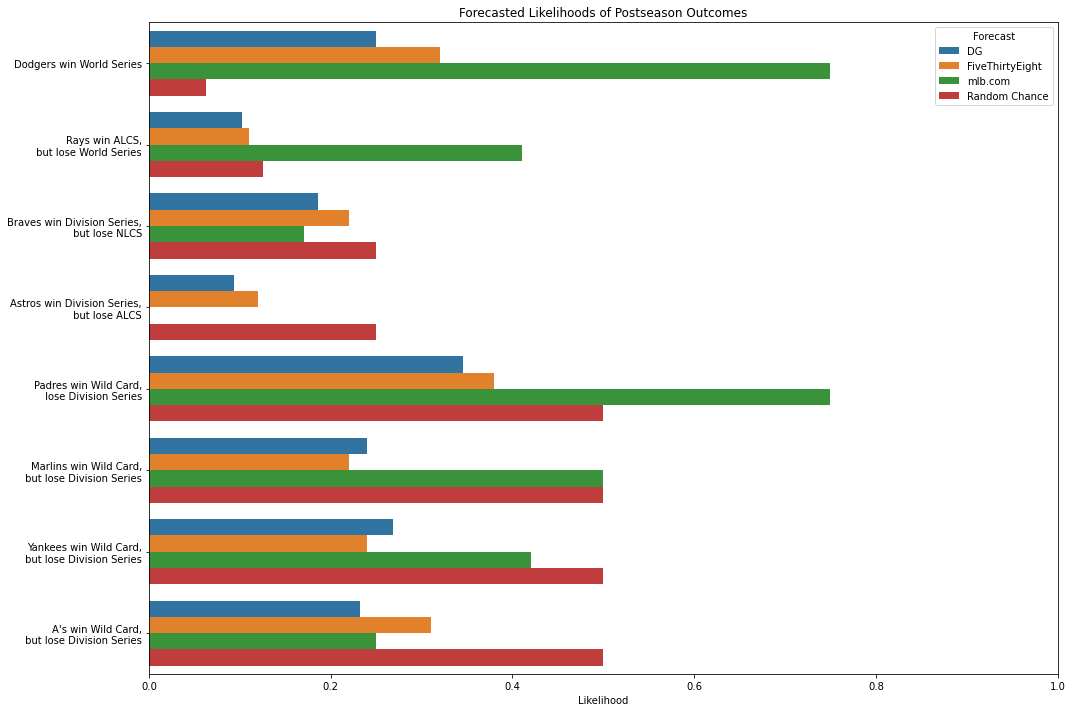

In [373]:
import seaborn as sns

FORECASTS = ['DG', 'FiveThirtyEight', 'mlb.com', 'Random Chance']
Y_LABEL = 'description'
X_LABEL = 'Likelihood'
LEGEND = 'Forecast'

fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Forecasted Likelihoods of Postseason Outcomes')

z = outcomes.melt(
    id_vars=Y_LABEL,
    value_vars=FORECASTS,
    value_name=X_LABEL,
    var_name=LEGEND)

sns.barplot(y=Y_LABEL, x=X_LABEL, hue=LEGEND, data=z)
ax.set(ylabel=None, xlim=(0, 1))

plt.tight_layout()
plt.savefig('2020-evaluations/forecasted-likelihoods.png')

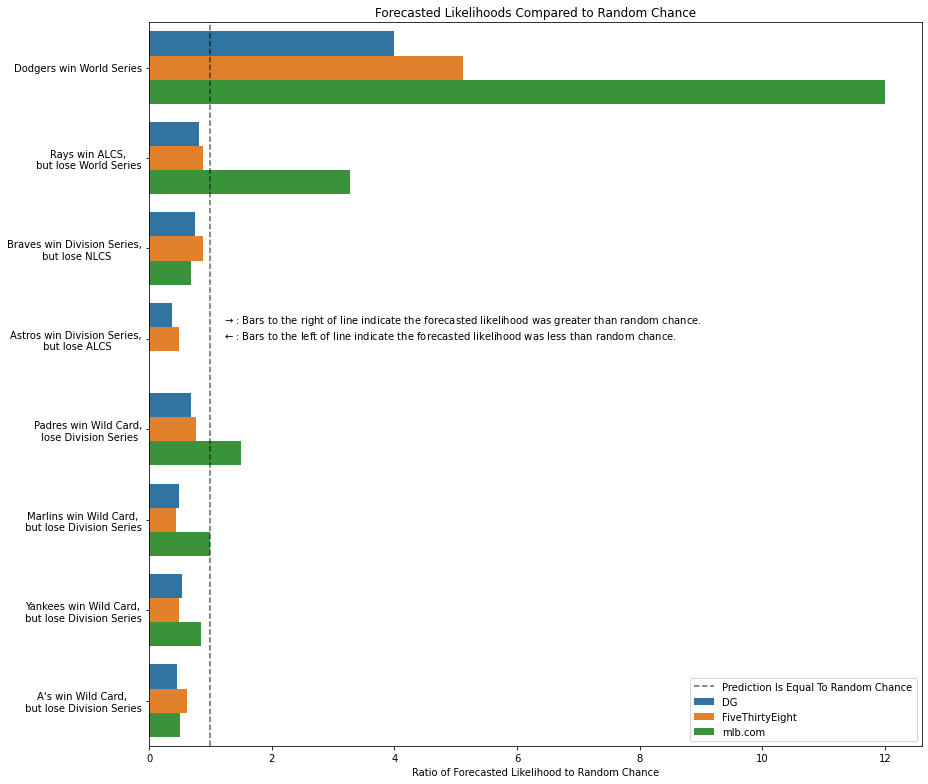

In [380]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(13, 11))

z = outcomes.copy()
z[FORECASTS] = z[FORECASTS] / z['Random Chance'].values.reshape((-1, 1))
z.drop('Random Chance', axis=1, inplace=True)
z = z.melt(
    id_vars=Y_LABEL,
    value_vars=FORECASTS[:-1],
    var_name=LEGEND,
    value_name='Ratio of Forecasted Likelihood to Random Chance')

sns.barplot(y=Y_LABEL, x='Ratio of Forecasted Likelihood to Random Chance', hue=LEGEND, data=z)

# reference line
ax.axvline(1, ls='--', color='k', alpha=0.6, label='Prediction Is Equal To Random Chance',)
ax.legend()
ax.annotate(
    r'$\rightarrow$: Bars to the right of line indicate the forecasted likelihood was greater than random chance.'
    '\n'
    r'$\leftarrow$: Bars to the left of line indicate the forecasted likelihood was less than random chance.',
    (1.2, 3))

# plot options
ax.set_title('Forecasted Likelihoods Compared to Random Chance')
ax.set(ylabel=None)
ax.set_yticklabels(ax.get_yticklabels(), multialignment='center')
plt.tight_layout()

plt.savefig('2020-evaluations/forecasts-vs-random.png')

In [369]:
random = 1 / (2 ** 15)

print(outcomes[FORECASTS].mean(axis=0).rename('Average Likelihood').to_markdown())
print()

print(outcomes[FORECASTS].prod(axis=0).rename('Total Likelihood').to_markdown())
print()


print(outcomes[FORECASTS].prod(axis=0).div(random).rename('Forecasted Likelihood / Random Chance').to_markdown())

|                 |   Average Likelihood |
|:----------------|---------------------:|
| DG              |             0.21445  |
| FiveThirtyEight |             0.24     |
| mlb.com         |             0.40625  |
| Random Chance   |             0.335938 |

|                 |   Total Likelihood |
|:----------------|-------------------:|
| DG              |        2.26652e-06 |
| FiveThirtyEight |        5.77997e-06 |
| mlb.com         |        0           |
| Random Chance   |        3.05176e-05 |

|                 |   Forecasted Likelihood / Random Chance |
|:----------------|----------------------------------------:|
| DG              |                               0.0742692 |
| FiveThirtyEight |                               0.189398  |
| mlb.com         |                               0         |
| Random Chance   |                               1         |
